In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import power_transform
from sklearn.ensemble import IsolationForest
from sklearn.cluster import AgglomerativeClustering

In [2]:
data=pd.read_csv('CC GENERAL.csv')

In [3]:
data.set_index(['CUST_ID'],inplace=True,drop=True)

In [4]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Try_imputation_with_KNN

In [5]:

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=7)
After_imputation = imputer.fit_transform(data)

In [6]:
new_data=pd.DataFrame(After_imputation,columns=data.columns)

# Outliers

In [7]:
new_data=pd.DataFrame(np.log1p(new_data))

# Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data_scaled=scale.fit_transform(new_data)

In [9]:
data_new=pd.DataFrame(data_scaled,columns=new_data.columns)
data_new

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.379045,0.862497,0.422994,0.000000,0.455879,0.000000,0.222393,0.000000,0.115477,0.000000,0.000000,0.186733,0.466811,0.490324,0.438874,0.000000,1.0
1,0.819116,0.932886,0.000000,0.000000,0.000000,0.815075,0.000000,0.000000,0.000000,0.243529,0.333889,0.000000,0.771814,0.767919,0.620013,0.289506,1.0
2,0.793799,1.000000,0.615884,0.626611,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.435970,0.782631,0.593925,0.572303,0.000000,1.0
3,0.752871,0.710494,0.677125,0.688918,0.000000,0.495472,0.115477,0.115477,0.000000,0.087355,0.143798,0.117816,0.782631,0.000000,0.541349,0.000000,1.0
4,0.680676,1.000000,0.262325,0.266894,0.000000,0.000000,0.115477,0.115477,0.000000,0.000000,0.000000,0.117816,0.495375,0.601905,0.488693,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.343413,1.000000,0.525644,0.000000,0.566509,0.000000,1.000000,0.000000,0.874469,0.000000,0.000000,0.330750,0.466811,0.534304,0.346621,0.584963,0.0
8946,0.304921,1.000000,0.528416,0.000000,0.569497,0.000000,1.000000,0.000000,0.874469,0.000000,0.000000,0.330750,0.466811,0.519056,0.436512,0.000000,0.0
8947,0.324169,0.874469,0.461047,0.000000,0.496890,0.000000,0.874469,0.000000,0.736966,0.000000,0.000000,0.304549,0.466811,0.407049,0.392423,0.321928,0.0
8948,0.271065,0.874469,0.000000,0.000000,0.000000,0.336954,0.000000,0.000000,0.000000,0.168234,0.227915,0.000000,0.358276,0.367415,0.358114,0.321928,0.0


# Tsne_Visualization

In [10]:
tsne_with_data = TSNE(n_components=2,n_jobs=-1,perplexity=30,random_state=1,n_iter=300,verbose=0)
tsne_res=tsne_with_data.fit_transform(data_new)

C:\Users\Honda\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Honda\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [11]:
data_new['res_tsne_0']=tsne_res[:,0]
data_new['res_tsne_1']=tsne_res[:,1]

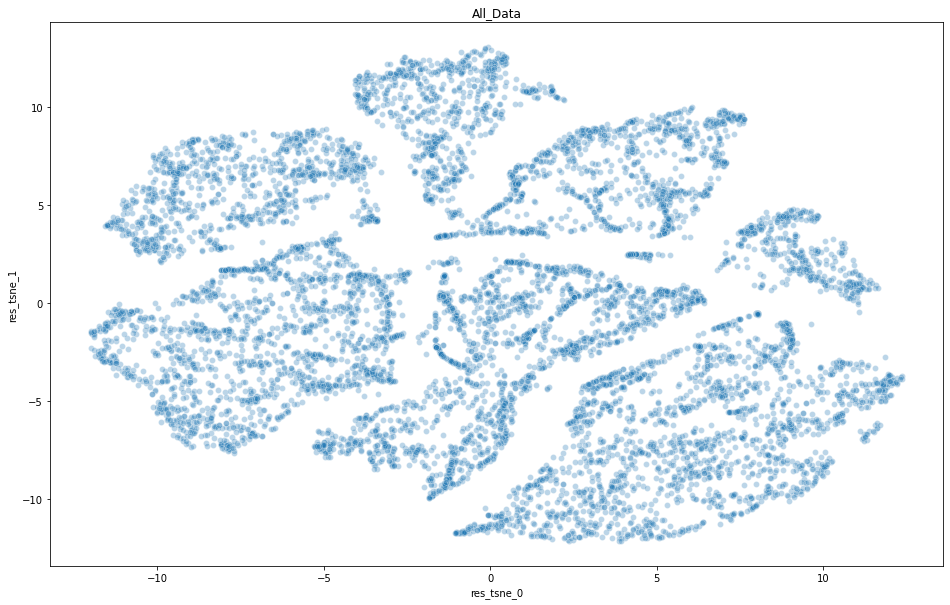

In [12]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=data_new['res_tsne_0'], y=data_new['res_tsne_1'],
    palette=sns.color_palette("hls", 1),
    legend="full",
    data=data_new,
    alpha=0.3
).set(title='All_Data');

# Isolated_Random_Forrest

In [14]:
If_clf = IsolationForest(n_estimators=300, max_features=0.5, contamination=0.1)
If_clf.fit(data_new)
anomaly_scores = If_clf.predict(data_new)

C:\Users\Honda\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


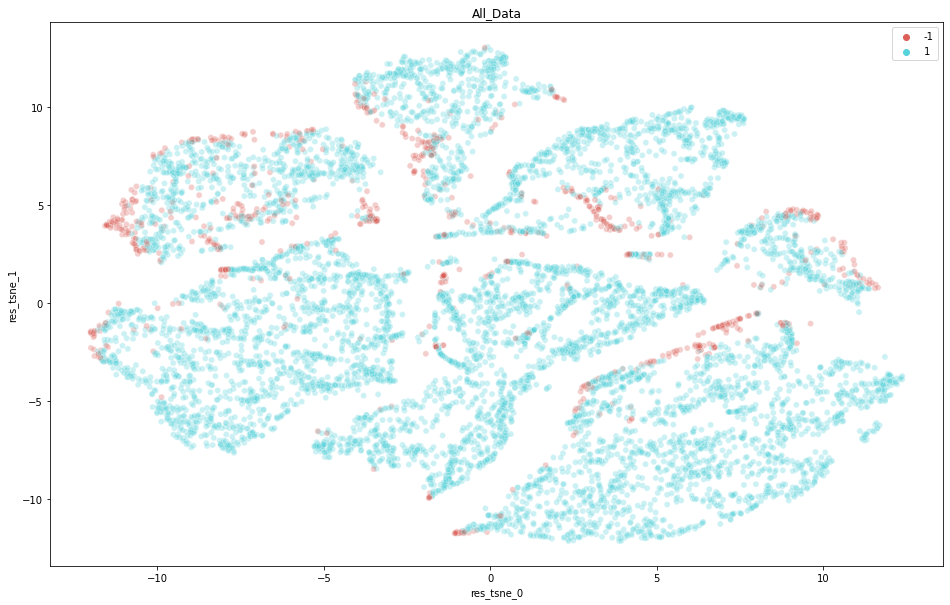

In [15]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=data_new['res_tsne_0'], y=data_new['res_tsne_1'],
    palette=sns.color_palette("hls", 2),
    legend="full",
    data=data_new,
    hue=anomaly_scores,
    alpha=0.3
).set(title='All_Data');

# EM

In [16]:
from sklearn.mixture import GaussianMixture

In [17]:
gausMix = GaussianMixture(n_components=2, random_state=0)
gausMix.fit(data_new.iloc[:,:-2])

GaussianMixture(n_components=2, random_state=0)

In [18]:
scores = gausMix.score_samples(data_new.iloc[:,:-2])

In [19]:
scores

array([13.6785518 , 33.89873955, 25.6745046 , ...,  6.26777849,
       20.9500211 , 20.44149846])

In [21]:
thresh = np.quantile(scores, .05)
print(thresh) 

3.167253714113088


In [22]:
new_scores=[-1 if val<= thresh  else 1 for val in scores]
np.unique(new_scores)

array([-1,  1])

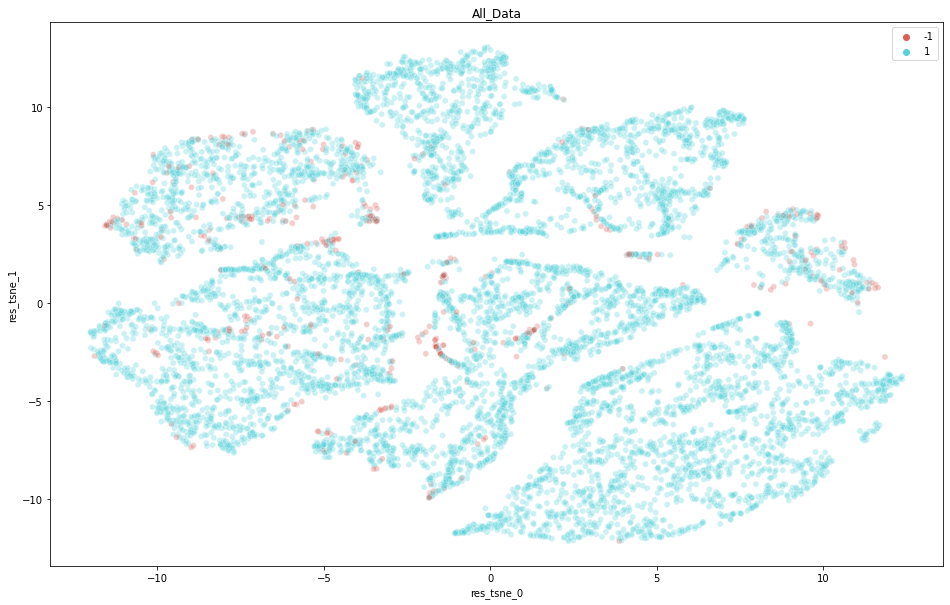

In [23]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=data_new['res_tsne_0'], y=data_new['res_tsne_1'],
    palette=sns.color_palette("hls", 2),
    legend="full",
    data=data_new,
    hue=new_scores,
    alpha=0.3
).set(title='All_Data');

# DBSCAN

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
data_new_Dbscan=pd.DataFrame(pca.fit_transform(new_data),index=new_data.index)

In [34]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(data_new_Dbscan)
distances, neighbors = neigh.kneighbors(data_new_Dbscan)
distances = np.sort(distances[:, -1], axis = 0)

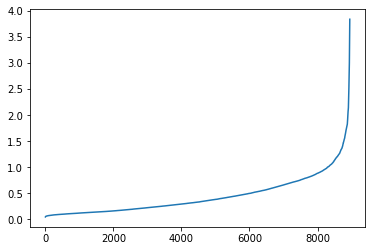

In [35]:
distances_df = pd.DataFrame({"distances": distances,
                             "index": list(range(0,len(distances)))})
plt.plot(distances_df['index'],distances_df['distances'])

In [36]:
db1 = DBSCAN(eps = 1, min_samples =5).fit(data_new_Dbscan)

data_new_Dbscan["y_DBSCAN"] = db1.labels_

In [37]:
data_new_Dbscan["y_DBSCAN"].value_counts()

 1    2043
 0    1790
 4    1696
 2    1059
 6     852
 3     745
 5     412
-1     348
 7       5
Name: y_DBSCAN, dtype: int64

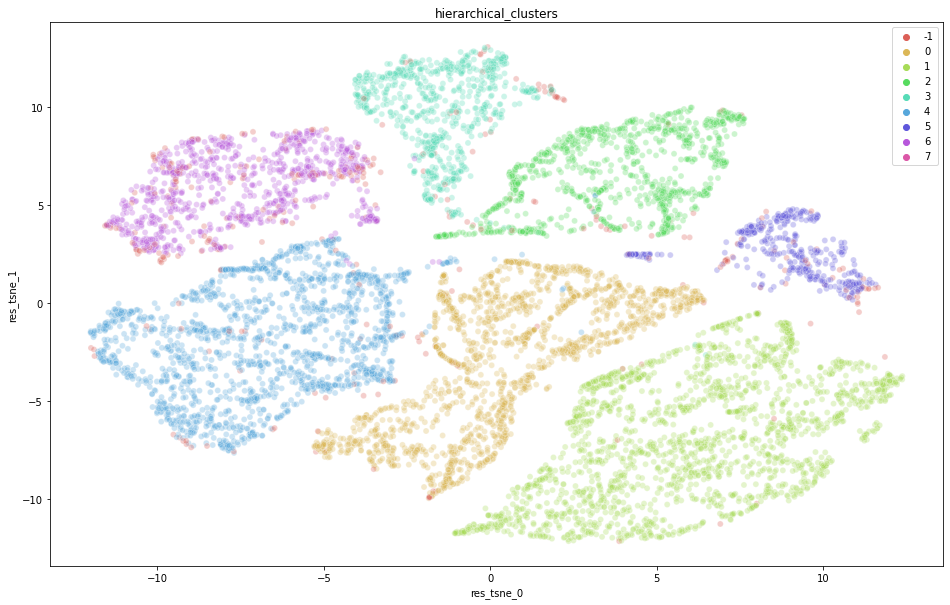

In [38]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=data_new['res_tsne_0'], y=data_new['res_tsne_1'],
    palette=sns.color_palette("hls", 9),
    data=data_new,
    hue=db1.labels_,
    legend="full",
    alpha=0.3
).set(title='hierarchical_clusters');